# Visualizing and analysing the dataset

## Loading train data

In [10]:
import load_data

In [12]:
DATA_DIR = "data"
utterance_dictionary = load_data.get_speaker_to_utterance(DATA_DIR)
print(utterance_dictionary)

{'spk_8': ['data/spk_8-8_16_0_1_d6_ch5.wav']}


## Reading and visualizing the audio file

In [14]:
!pip install librosa
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 1.5 MB/s eta 0:00:001.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.4/389.4 kB 7.7 MB/s eta 0:00:009.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.2/231.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [16]:
TEST_SPEAKER = utterance_dictionary['spk_8'][0]

In [18]:
# Read data
x, sr = librosa.load(TEST_SPEAKER, sr=None)

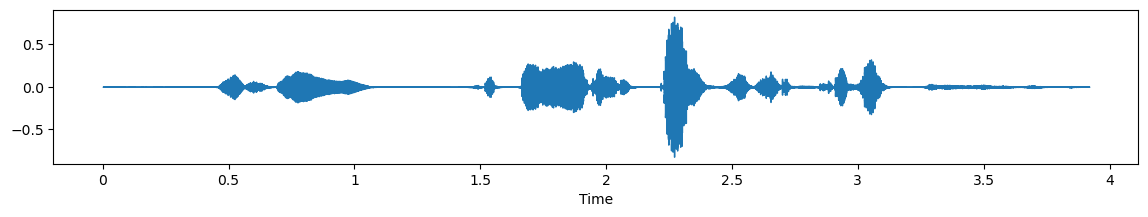

In [19]:
# Plot waveform
plt.figure(figsize=(14, 2))
librosa.display.waveshow(x, sr=sr)

## Calculate and visualize spectral features

### Short Time Fourier Transform

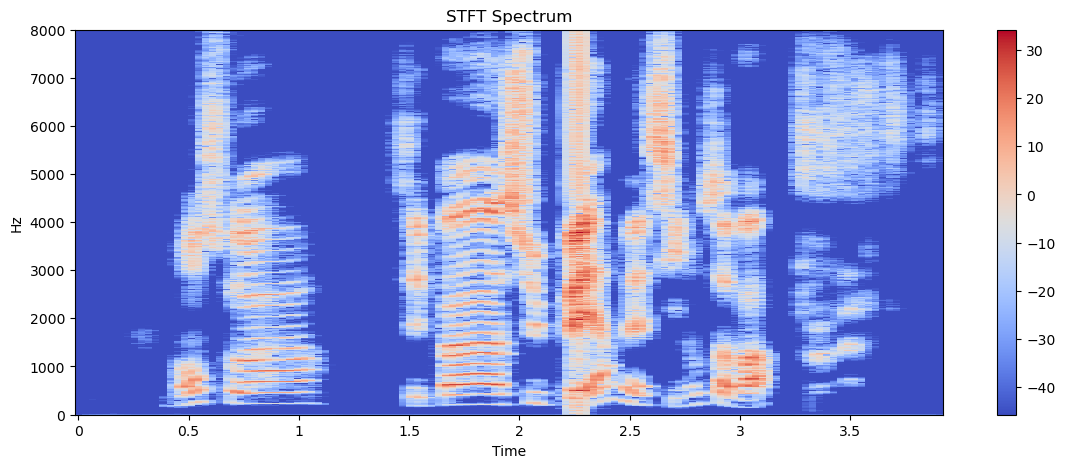

In [46]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, cmap='coolwarm', x_axis='time', y_axis='hz')
#If to pring log of frequencies
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title("STFT Spectrum")
plt.colorbar();

### Mel Frequency Cepstral Coefficients

(50, 123)


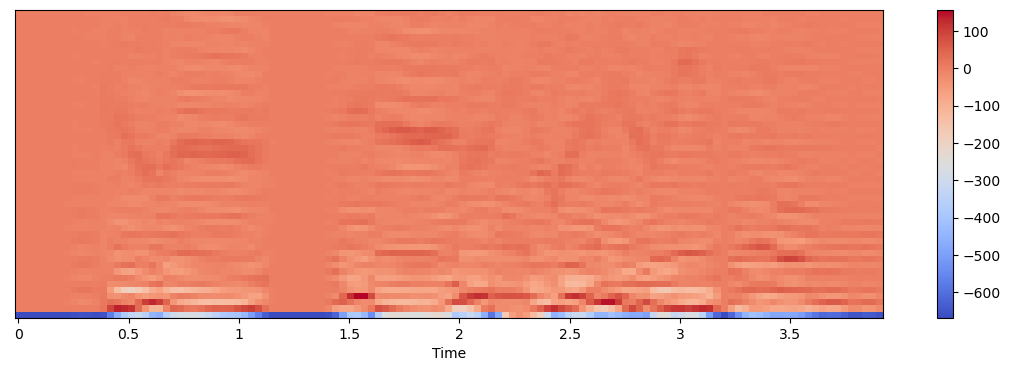

In [52]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=50)
print(mfccs.shape)
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar();